In [2]:
#!pip install yfinance
#!pip install numpy
#!pip install matplotlib
#!pip install pandas

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew, kurtosis
import math
from tabulate import tabulate

In [3]:
# Retrieve Bitcoin prices from Yahoo Finance API
start_date = '2015-01-01'
end_date = '2023-01-01'
tickers = ['BTC-USD', 'AAPL', 'GOOGL', 'AMZN', 'NVDA', '^NDX', 'XU100.IS', 'AKBNK.IS', 'TUPRS.IS']

data_daily = yf.download(tickers, start=start_date, end=end_date, interval='1d', group_by='ticker')
data_yearly = data_daily.resample('Y').last()
data_monthly = data_daily.resample('M').last()
data_weekly = data_daily.resample('W').last()

[*********************100%%**********************]  9 of 9 completed


In [4]:
# Get 'Close' prices for all tickers
close_prices_daily = data_daily.loc[:, (slice(None), 'Close')]
close_prices_weekly = data_weekly.loc[:, (slice(None), 'Close')]
close_prices_monthly = data_monthly.loc[:, (slice(None), 'Close')]
close_prices_yearly = data_yearly.loc[:, (slice(None), 'Close')]

close_prices_dict = {
    'Daily': close_prices_daily, 
    'Weekly': close_prices_weekly, 
    'Monthly': close_prices_monthly, 
    'Yearly': close_prices_yearly
    }

for key, close_prices in close_prices_dict.items():
    close_prices_dict[key].columns = close_prices_dict[key].columns.droplevel(1)

In [5]:
# BUNU ÇALIŞTIRMA
close_prices_dict["Daily"]['XU100.IS'].iloc[:2034] = close_prices_dict["Daily"]['XU100.IS'].iloc[:2034].apply(lambda x: x / 100)


<ipython-input-5-28885306c4cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices_dict["Daily"]['XU100.IS'].iloc[:2034] = close_prices_dict["Daily"]['XU100.IS'].iloc[:2034].apply(lambda x: x / 100)


In [6]:
# Daily Lists
daily_lists = {}

for ticker in tickers:
    # Filter out NaN values from the list
    cleaned_list = [price for price in close_prices_dict["Daily"][ticker].tolist() if not math.isnan(price)]

    # Modify prices for specific ticker if necessary
    if ticker == 'XU100.IS':
        cleaned_list = [price / 100 if price > 20000 else price for price in cleaned_list]
    
    daily_lists[ticker] = cleaned_list

# Weekly Lists
weekly_lists = {}

for ticker in tickers:
    # Filter out NaN values from the list
    cleaned_list = [price for price in close_prices_dict["Weekly"][ticker].tolist() if not math.isnan(price)]

    # Modify prices for specific ticker if necessary
    if ticker == 'XU100.IS':
        cleaned_list = [price / 100 if price > 20000 else price for price in cleaned_list]
    
    weekly_lists[ticker] = cleaned_list

# Monthly Lists
monthly_lists = {}

for ticker in tickers:
    # Filter out NaN values from the list
    cleaned_list = [price for price in close_prices_dict["Monthly"][ticker].tolist() if not math.isnan(price)]

    # Modify prices for specific ticker if necessary
    if ticker == 'XU100.IS':
        cleaned_list = [price / 100 if price > 20000 else price for price in cleaned_list]
    
    monthly_lists[ticker] = cleaned_list

# Yearly Lists
yearly_lists = {}

for ticker in tickers:
    # Filter out NaN values from the list
    cleaned_list = [price for price in close_prices_dict["Yearly"][ticker].tolist() if not math.isnan(price)]

    # Modify prices for specific ticker if necessary
    if ticker == 'XU100.IS':
        cleaned_list = [price / 100 if price > 20000 else price for price in cleaned_list]
    
    yearly_lists[ticker] = cleaned_list

In [7]:
linear_returns = {}

for key, lst in daily_lists.items():
    linear_returns[key] = pd.Series(lst).pct_change()

In [8]:
for key, returns in linear_returns.items():
    print(f"Linear {key} Returns:")
    print(returns)

Linear BTC-USD Returns:
0            NaN
1       0.002492
2      -0.107767
3      -0.060079
4       0.038907
          ...   
2917   -0.011976
2918   -0.009846
2919    0.005423
2920   -0.002389
2921   -0.003318
Length: 2922, dtype: float64
Linear AAPL Returns:
0            NaN
1      -0.028172
2       0.000094
3       0.014022
4       0.038422
          ...   
2009   -0.002798
2010   -0.013878
2011   -0.030685
2012    0.028324
2013    0.002469
Length: 2014, dtype: float64
Linear GOOGL Returns:
0            NaN
1      -0.019054
2      -0.024679
3      -0.002941
4       0.003484
          ...   
2009    0.016750
2010   -0.020621
2011   -0.015677
2012    0.028249
2013   -0.002487
Length: 2014, dtype: float64
Linear AMZN Returns:
0            NaN
1      -0.020517
2      -0.022833
3       0.010600
4       0.006836
          ...   
2009    0.017425
2010   -0.025924
2011   -0.014692
2012    0.028844
2013   -0.002138
Length: 2014, dtype: float64
Linear NVDA Returns:
0            NaN
1      -0.

In [9]:
def calculate_statistics(data):
    mean = np.mean(data)
    variance = np.var(data, ddof=1)  # ddof=1 for sample variance
    std_dev = np.std(data, ddof=1)   # ddof=1 for sample standard deviation
    skewness = skew(data)
    excess_kurtosis = kurtosis(data, fisher=True)  # Fisher's definition for excess kurtosis
    return [mean, variance, std_dev, skewness, excess_kurtosis]

In [10]:
# Daily Stats
daily_stats = {}

for key, daily_list in daily_lists.items():
    daily_stats[key] = calculate_statistics(pd.Series(daily_list).pct_change()[1:])

# Weekly Stats
weekly_stats = {}
for key, weekly_list in weekly_lists.items():
    weekly_stats[key] = calculate_statistics(pd.Series(weekly_list).pct_change()[1:])

# Monthly Stats
monthly_stats = {}
for key, monthly_list in monthly_lists.items():
    monthly_stats[key] = calculate_statistics(pd.Series(monthly_list).pct_change()[1:])

# Yearly Stats
yearly_stats = {}
for key, yearly_list in yearly_lists.items():
    yearly_stats[key] = calculate_statistics(pd.Series(yearly_list).pct_change()[1:])


In [11]:
def print_stats(title: str, stats_dict: dict):
    headers = ["Asset", "Mean", "Variance", "Std_Dev", "Skewness", "Excess_Kurtosis"]
    data = []

    # Extract asset names and corresponding stats from the dictionary
    for asset, stats in stats_dict.items():
        data.append([asset] + stats)

    # Print the table
    print(title)
    print(tabulate(data, headers=headers, tablefmt="pretty"))
    print("\n")

In [12]:
# Daily Stats Print
print_stats("Daily Stats", daily_stats)

# Weekly Stats Print
print_stats("Weekly Stats", weekly_stats)

# Monthly Stats Print
print_stats("Monthly Stats", monthly_stats)

# Yearly Stats Print
print_stats("Yearly Stats", yearly_stats)

Daily Stats
+----------+-----------------------+------------------------+----------------------+-----------------------+--------------------+
|  Asset   |         Mean          |        Variance        |       Std_Dev        |       Skewness        |  Excess_Kurtosis   |
+----------+-----------------------+------------------------+----------------------+-----------------------+--------------------+
| BTC-USD  | 0.0021063309061159657 | 0.0014816218515253628  | 0.03849184136314295  | -0.18074182910785652  | 7.232555472876557  |
|   AAPL   | 0.0009528695019091577 | 0.0003562676511718384  | 0.018875053673349868 | -0.012155994650217123 | 5.065525756576097  |
|  GOOGL   | 0.0007563174873536244 |  0.000317516721150735  | 0.017818998881832138 |  0.3176315156256816   | 7.294362301596372  |
|   AMZN   | 0.0010608860607751731 |  0.000439943238417502  | 0.020974823918629256 |  0.4692231135249699   | 6.749361248965535  |
|   NVDA   | 0.0021307066908837703 | 0.0009182041404484717  | 0.03030188344721

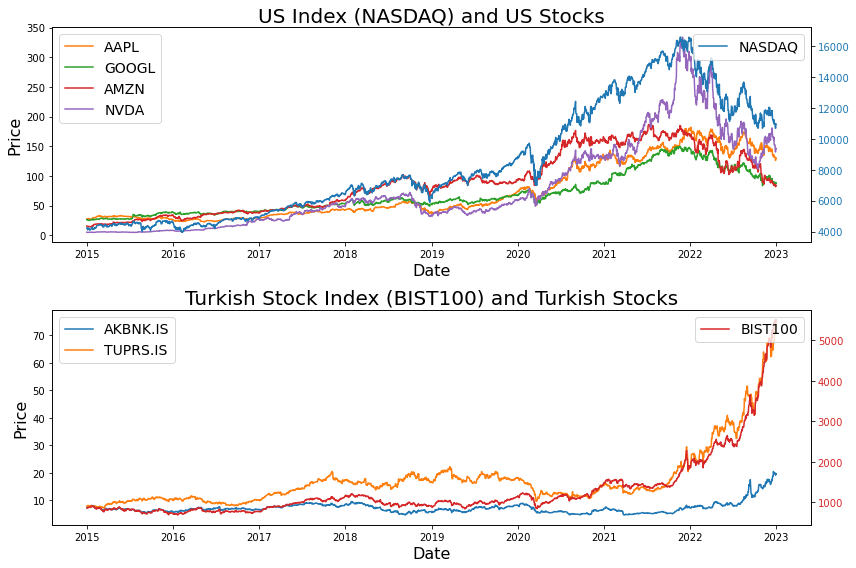

In [13]:
# Create a figure with 2 subplots (one for US stocks and one for Turkish stocks)
fig, axs = plt.subplots(2, figsize=(12,8))

# Plot US index (NASDAQ) and US stocks in the first subplot
axs[0].set_title('US Index (NASDAQ) and US Stocks', fontsize=20)
axs[0].set_xlabel('Date', fontsize=16)
axs[0].set_ylabel('Price', fontsize=16)

# Create a second y-axis for the NASDAQ data
ax2 = axs[0].twinx()

# Plot NASDAQ on the second y-axis
ax2.plot(close_prices_dict["Daily"]['^NDX'].fillna(method='ffill'), label='NASDAQ', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=14)  # Move NASDAQ legend to right

# Plot the stocks on the first y-axis
axs[0].plot(close_prices_dict["Daily"]['AAPL'].fillna(method='ffill'), label='AAPL', color='tab:orange')
axs[0].plot(close_prices_dict["Daily"]['GOOGL'].fillna(method='ffill'), label='GOOGL', color='tab:green')
axs[0].plot(close_prices_dict["Daily"]['AMZN'].fillna(method='ffill'), label='AMZN', color='tab:red')
axs[0].plot(close_prices_dict["Daily"]['NVDA'].fillna(method='ffill'), label='NVDA', color='tab:purple')
axs[0].legend(loc='upper left', fontsize=14)

# Plot Turkish Stock index (BIST100) and Turkish stocks in the second subplot
axs[1].set_title('Turkish Stock Index (BIST100) and Turkish Stocks', fontsize=20)
axs[1].set_xlabel('Date', fontsize=16)
axs[1].set_ylabel('Price', fontsize=16)

# Create a second y-axis for the BIST100 data
ax3 = axs[1].twinx()
ax3.plot(close_prices_dict["Daily"]['XU100.IS'].fillna(method='ffill'), label='BIST100', color='tab:red')
ax3.tick_params(axis='y', labelcolor='tab:red')
ax3.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=14)  # Move BIST100 legend to right

axs[1].plot(close_prices_dict["Daily"]['AKBNK.IS'].fillna(method='ffill'), label='AKBNK.IS')
axs[1].plot(close_prices_dict["Daily"]['TUPRS.IS'].fillna(method='ffill'), label='TUPRS.IS')
axs[1].legend(loc='upper left', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

In [14]:
def calculate_stats(data, label):
    mean = np.mean(data)
    std_dev = np.std(data)
    print(f"{label} Mean: {mean:.6f}, Standard Deviation: {std_dev:.6f}")

AAPL Mean: 0.000953, Standard Deviation: 0.018870
BTC Mean: 0.002106, Standard Deviation: 0.038485
GOOGL Mean: 0.000756, Standard Deviation: 0.017815
AMZN Mean: 0.001061, Standard Deviation: 0.020970
NVDA Mean: 0.002131, Standard Deviation: 0.030294


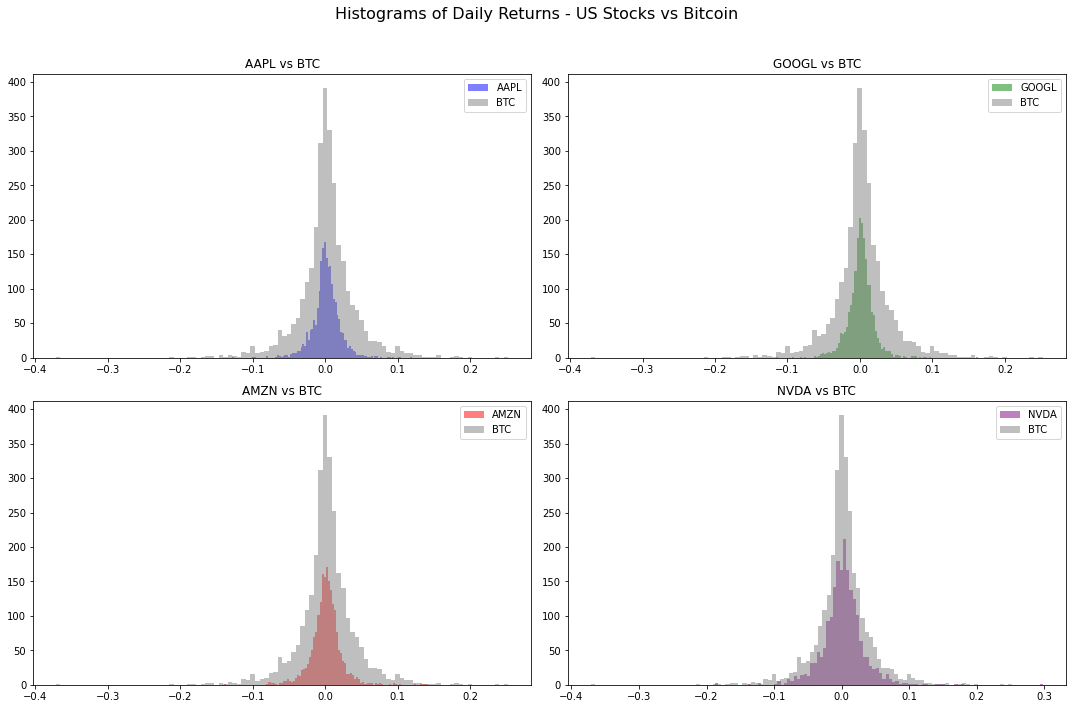

In [15]:
# Create a figure and axis for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Histograms of Daily Returns - US Stocks vs Bitcoin', fontsize=16)

# Plot histograms for each stock against Bitcoin with increased sensitivity (more bins)
bins = 100

btc_data = linear_returns["BTC-USD"].dropna()

# AAPL vs BTC
aapl_data = linear_returns["AAPL"].dropna()
axes[0, 0].hist(aapl_data, bins=bins, color='blue', alpha=0.5, label='AAPL')
axes[0, 0].hist(btc_data, bins=bins, color='gray', alpha=0.5, label='BTC')
axes[0, 0].set_title('AAPL vs BTC')
axes[0, 0].legend()
calculate_stats(aapl_data, 'AAPL')
calculate_stats(btc_data, 'BTC')

# GOOGL vs BTC
googl_data = linear_returns["GOOGL"].dropna()
axes[0, 1].hist(googl_data, bins=bins, color='green', alpha=0.5, label='GOOGL')
axes[0, 1].hist(btc_data, bins=bins, color='gray', alpha=0.5, label='BTC')
axes[0, 1].set_title('GOOGL vs BTC')
axes[0, 1].legend()
calculate_stats(googl_data, 'GOOGL')

# AMZN vs BTC
amzn_data = linear_returns["AMZN"].dropna()
axes[1, 0].hist(amzn_data, bins=bins, color='red', alpha=0.5, label='AMZN')
axes[1, 0].hist(btc_data, bins=bins, color='gray', alpha=0.5, label='BTC')
axes[1, 0].set_title('AMZN vs BTC')
axes[1, 0].legend()
calculate_stats(amzn_data, 'AMZN')

# NVDA vs BTC
nvda_data = linear_returns["NVDA"].dropna()
axes[1, 1].hist(nvda_data, bins=bins, color='purple', alpha=0.5, label='NVDA')
axes[1, 1].hist(btc_data, bins=bins, color='gray', alpha=0.5, label='BTC')
axes[1, 1].set_title('NVDA vs BTC')
axes[1, 1].legend()
calculate_stats(nvda_data, 'NVDA')

# Adjust layout for better appearance
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()

In [16]:
na_dropped_daily = {}
for ticker in tickers:
    na_dropped_daily[ticker] = close_prices_dict["Daily"][ticker].dropna()

In [18]:
# Reindex BTC-USD based on AAPL dates
reindexed_btc = {}

for ticker in tickers:
    if ticker == 'BTC-USD':
        continue
    reindexed_btc[ticker] = na_dropped_daily["BTC-USD"].reindex(index=na_dropped_daily[ticker].index)

Date
2015-01-02      315.032013
2015-01-05      274.473999
2015-01-06      286.188995
2015-01-07      294.337006
2015-01-08      283.348999
                  ...     
2022-12-23    16796.953125
2022-12-27    16717.173828
2022-12-28    16552.572266
2022-12-29    16642.341797
2022-12-30    16602.585938
Name: BTC-USD, Length: 2014, dtype: float64